## 지도학습 분류(Classification)와 라벨 
### VDS 데이터를 이용하여 머신러닝 모델을 적용해본다
### VDS 데이터 라벨을 이용하여 인공신경망을 적용해본다 
- 학습목표: 라벨링에 따른 머신러닝과 딥러닝(인공신경망) 모델의 특성을 이해한다.

## I. 데이터 가져오기 
- 판다스를 이용하여 교통 데이터 가져오기

(6451, 4) (6451,)
(1613, 4) (1613,)


C:\Users\admin\AppData\Local\Temp\ipykernel_29232\3976413795.py:82: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()
C:\Users\admin\AppData\Local\Temp\ipykernel_29232\3976413795.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(
C:\Users\admin\AppData\Local\Temp\ipykernel_29232\3976413795.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(
C:\Users\admin\AppData\Local\Temp\ipykernel_29232\3976413795.py:88: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(
C:\Users\admin\AppData\Local\Temp\ipykernel_29232\3976413795.py:88: FutureW

<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\Anaconda3\\envs\\tf-gpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

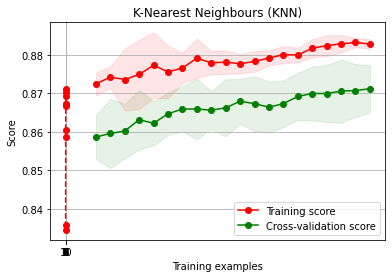

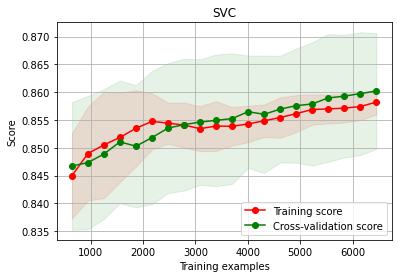

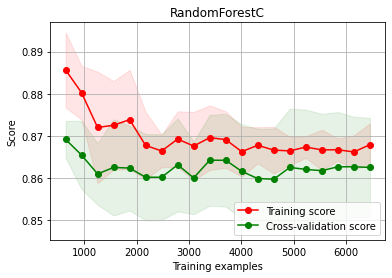

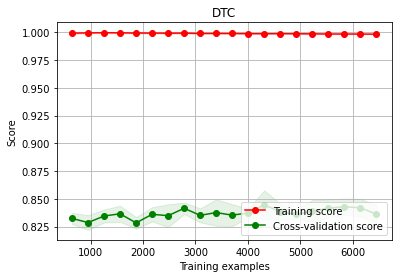

In [5]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv('./daejeon_vds16.csv')
df.head()

def get_score(v):
    if v < 30:
        score = 'Jam'
    elif v < 50:
        score = 'Slow'
    else :
        score = 'Normal'
    return score

df["label_speed"] = df["Speed"].apply(lambda v: get_score(v))

import matplotlib.pyplot as plt
df['label_speed'].unique()
feature_cols = ['ToVol','Occ.Rate','LaVol', 'MeVol']
target_col = 'label_speed'
X = df[feature_cols]
y = df[target_col]

class_dic = {'Jam':0, 'Slow':1, 'Normal':2}
y_ohc = y.apply(lambda z: class_dic[z])
y_ohc.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohc, test_size=0.20, random_state=30)
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import numpy as np
def plot_ml_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc='lower right')
    return plt

## (A) K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier 
#- n_neighbors :  default=5
from sklearn import metrics   
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import ShuffleSplit, learning_curve

model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)

pred = model.predict(X_test)
metrics.accuracy_score(pred,y_test)

title = "K-Nearest Neighbours (KNN)"
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
plot_ml_curve(model, title, X, y,  cv=cv, n_jobs=4)

# 3.1 최적의 k-NN의 정확도 확인 
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    kcs = KNeighborsClassifier(n_neighbors=i) 
    kcs.fit(X_train,y_train)
    y_pred = kcs.predict(X_test)
    a=a.append(pd.Series(
        metrics.accuracy_score(y_pred,y_test)))
    
plt.plot(a_index, a,'ro--')
plt.xticks(x)

## (B) Support Vector Machine Classification
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
metrics.accuracy_score(pred, y_test)
title='SVC'
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
plot_ml_curve(model, title, X, y,  cv=cv)

## (C) RandomForest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
metrics.accuracy_score(pred, y_test)

title='RandomForestC'
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
plot_ml_curve(model, title, X, y,  cv=cv)

## (D) Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
metrics.accuracy_score(pred, y_test)

title='DTC'
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
plot_ml_curve(model, title, X, y,  cv=cv)

# (1) 연습문제 해보기 : 속도
- VDS 데이터의 라벨을 속도(Speed)에 대하여 자신의 라벨을 정의하시오
- 예 (20, 50) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (2) 연습문제 해보기 : 교통량
### 교통량(ToVol) 혹은 SmVol로 라벨을 정하는 방법을 적용하세요
- 예 (100, 300) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (3) 연습문제 해보기
- VDS 데이터의 라벨을 점유률(Occ.Rate)에 대하여 자신의 라벨을 정의하시오
- 예 (8, 16) 등 
- 훈련(Train)과 시험(Test)의 정확도 혹은 손실(Loss)를 제출하시오

# (4) 연습문제 해보기
- 머신러닝 방법과 DNN 방법을 비교하여 자장 휼룡한 신경망 방법과 하이퍼파라미터를 설정하세요.